In [37]:
import numpy as np
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
order_data_path = '.\eleme_round1_testB\order'
filename = 'order_20200301.txt'
order_data = pd.read_csv(os.path.join(order_data_path,filename))
order_data

,courier_id,wave_index,tracking_id,weather_grade,pick_lng,pick_lat,deliver_lng,deliver_lat,create_time,confirm_time,assigned_time,promise_deliver_time,estimate_pick_time,aoi_id,shop_id
0,100002543,3,2100076043279042258,正常天气,121.634326,39.139450,121.627454,39.133901,1583036107,1583036108,1583036150,1583038927,1583037308,13f8f2302b45997388ede0af8ae9666c,8ba9b3c86b2c240b3436e5431ad68cdf
1,100002543,3,2100076045156320581,正常天气,121.630624,39.134761,121.627434,39.151311,1583036574,1583036575,1583036629,1583039154,1583037835,bf49288eb197bc6b44fa0573acf8c74d,d97fb99890e2ace6955f21909cdd62dc
2,100002543,3,2100076044413207877,正常天气,121.630624,39.134761,121.628234,39.151201,1583036761,1583036762,1583036809,1583039641,1583038022,bf49288eb197bc6b44fa0573acf8c74d,d97fb99890e2ace6955f21909cdd62dc
3,100002543,3,2100076044139038021,正常天气,121.630624,39.134761,121.626044,39.151461,1583037264,1583037266,1583037289,1583040204,1583038706,bf49288eb197bc6b44fa0573acf8c74d,d97fb99890e2ace6955f21909cdd62dc
4,100002543,3,2100076045016368756,正常天气,121.628645,39.134531,121.629434,39.163821,1583037530,1583037530,1583037829,1583040530,1583038430,4b63bb7d8b5d8c847adbced3a03eb117,d5f36d54c0b0e914d6676fd87bfd5a0c
5,100006950,3,2100076084260308951,正常天气,121.405083,39.038953,121.404974,39.043881,1583059661,1583059662,1583059719,1583061641,1583060442,594ca29a20304cd527afc692855baa8d,c9ffd2d8caf2a4eb70b304097d59c4ea
6,100006950,3,2100076084649002967,正常天气,121.405083,39.038953,121.400604,39.047261,1583059965,1583059967,1583060020,1583062005,1583060747,077f0ac3ad8ba641e5ac0defcd59f75e,c9ffd2d8caf2a4eb70b304097d59c4ea
7,100006950,3,2100076085507393263,正常天气,121.412077,39.042021,121.395734,39.044271,1583059998,1583059999,1583060079,1583063178,1583061259,6f0f2c8a4249e332ed571627d889c3d8,a5f58cbe918e7ed240a9dbd77f9305e6
8,100006950,3,2100076086414968050,正常天气,121.411774,39.042251,121.401354,39.044701,1583060198,1583060204,1583060259,1583062418,1583061284,4021e054ae7bf60be3618d495c130039,0079217185fc5b5fc1ff7709109fa040
9,100006950,3,2100076086461237066,正常天气,121.411257,39.042865,121.396294,39.047231,1583060461,1583060463,1583060499,1583063341,1583061483,3673caaa2db4ffaee80ba001703c8912,a5a834b5cafd03031f5bb4f52fbdca05


In [33]:
def get_standard_time(date):
    sec_per_hour = 3600
    anchor_time_stamp = 1585297516
    days_shift = (27-date)*24*sec_per_hour
    const_shift = 16*3600 + 25*60 + 16
    return anchor_time_stamp - days_shift - const_shift
begin_time = get_standard_time(1)
norm_minu_data = (order_data[['assigned_time','confirm_time','estimate_pick_time','promise_deliver_time']] - begin_time)/60
norm_minu_data.loc[(norm_minu_data[['assigned_time','confirm_time','estimate_pick_time','promise_deliver_time']] < 0).any(axis=1)] = 0
norm_hour_data = norm_minu_data/60
order_data.update(norm_minu_data)

### Plot

In [34]:
norm_hour_data

,assigned_time,confirm_time,estimate_pick_time,promise_deliver_time
0,12.263889,12.252222,12.585556,13.035278
1,12.396944,12.381944,12.731944,13.098333
2,12.446944,12.433889,12.783889,13.233611
3,12.580278,12.573889,12.973889,13.390000
4,12.730278,12.647222,12.897222,13.480556
5,18.810833,18.795000,19.011667,19.344722
6,18.894444,18.879722,19.096389,19.445833
7,18.910833,18.888611,19.238611,19.771667
8,18.960833,18.945556,19.245556,19.560556
9,19.027500,19.017500,19.300833,19.816944


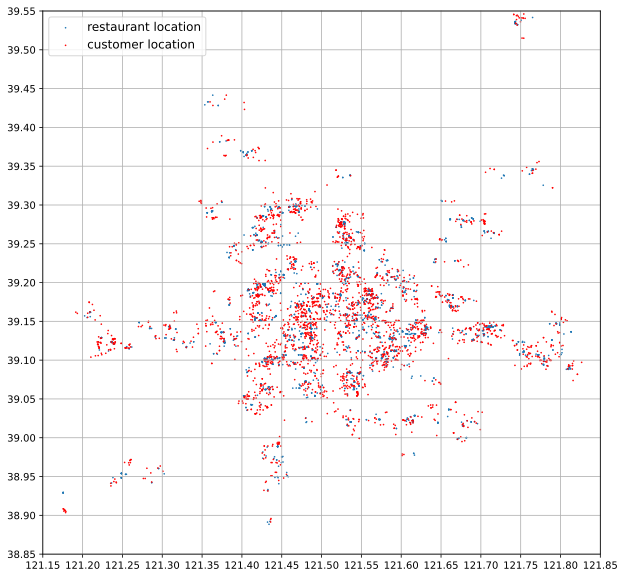

In [35]:
# order_data[order_data['wave_index'] == 1].iloc[1]['courier_id']
data = order_data
''' scatter '''
plt.figure(figsize=(10,10))
plt.xticks(np.arange(121.1, 122.1 ,0.05))
plt.yticks(np.arange(38.8,39.7,0.05))
plt.xlim(121.15, 121.85)
plt.ylim(38.85, 39.55)
plt.scatter(data['pick_lng'],data['pick_lat'],s=0.5,label = 'restaurant location')
plt.scatter(data['deliver_lng'],data['deliver_lat'],s=0.5, c='r', label = 'customer location')
plt.legend(fontsize=12)
plt.grid()


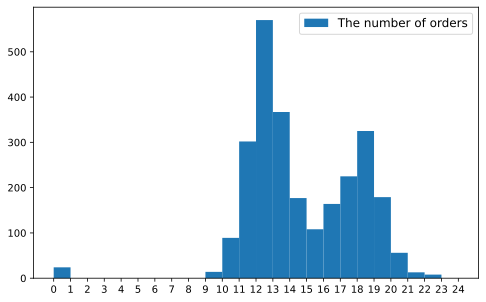

In [39]:
''' hist '''
plt.figure(figsize=(8,5))
bins = np.linspace(0,24,25)
plt.xticks(bins); #plt.xlim(0,24)
plt.hist(norm_hour_data['promise_deliver_time'],bins = bins,label='The number of orders')
plt.legend(fontsize=12)

### Zoning and Sample a small batch of orders as a case

In [6]:
def time_narrowing_data(data, start, range):
    data.loc[:,'estimate_pick_time'] -= start
    data.loc[:,'promise_deliver_time'] -= start
    narrowed_data = data[(data['estimate_pick_time'] > 0) & (data['estimate_pick_time'] < range)].copy(deep = True)
    return narrowed_data

def zoning_from_data(data, lng1, lng2, lat1, lat2):
    data = data.drop(columns= ['tracking_id', 'weather_grade', 'create_time', 'confirm_time', 'assigned_time', 'aoi_id'],errors='ignore')
    zoned_data = data[(lng1 <= data['pick_lng']) &
                      (lng2 >= data['pick_lng']) &
                      (lat1 <= data['pick_lat']) &
                      (lat2 >= data['pick_lat'])].copy(deep = True)
    return zoned_data

def sample_from_data(data, case_num, courier_num):
    cases = []; iloc1 = 0; iloc2 = 0
    for i in range(case_num):
        ccount = 1
        curname = data.iloc[iloc1]['courier_id']
        while ccount <= courier_num: #find the the right indexes to select
            iloc2 += 1
            if  data.iloc[iloc2]['courier_id'] != curname:
                curname = data.iloc[iloc2]['courier_id']
                ccount += 1
        cases.append(data.iloc[iloc1:iloc2].copy(deep = True))
        iloc1 = iloc2
    return cases

courier number:  36
order number: 232


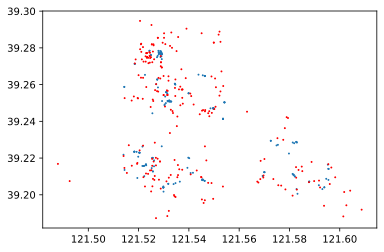

In [7]:
courier_num = 7
case_num = 2
# divide a group of cases in a specific area by specify longitude and latitude.
llgt1 = (121.5, 121.6, 39.2, 39.3)
data = zoning_from_data(data,*llgt1)
# cases = sample_from_data(zoning_from_data(span_data,*llgt1), case_num, courier_num)
# data = cases[0]
plt.scatter(data['pick_lng'],data['pick_lat'],s=1)
plt.scatter(data['deliver_lng'],data['deliver_lat'],s=1, c='r')
# data['promise_deliver_time'] - data['estimate_pick_time']
courier_num = data.groupby('courier_id').count().shape[0]
print('courier number: ',courier_num)
print('order number:', len(data))

# Build 'nodes', 'distance_Matrix' from sampled data

In [8]:
def generate_nodes_data(data):
    nodes_data = data[['pick_lng','pick_lat','deliver_lng','deliver_lat','promise_deliver_time','estimate_pick_time','shop_id']].copy()
    nodes_data.loc[:,'order_id'] = range(0,len(data))

    # ----- rstr_data ------
    rstr_data = nodes_data[['pick_lng','pick_lat','order_id','estimate_pick_time','shop_id']].rename(columns={'pick_lng':'longitude','pick_lat':'latitude','estimate_pick_time':'time'})
    rstr_data['type'] = 101
    # pick n drone-base
    order_per_shop = data.groupby(['shop_id']).count()
    drone_base_list = order_per_shop.sort_values(by=['wave_index'],ascending = False)[0:3].index.tolist()
    rstr_data.loc[rstr_data['shop_id'].isin(drone_base_list),'type'] = 103
    rstr_data.drop(columns=['shop_id'], inplace=True)

    # ----- cstm_data ------
    cstm_data = nodes_data[['deliver_lng','deliver_lat','order_id','promise_deliver_time']].rename(columns={'deliver_lng':'longitude','deliver_lat':'latitude','promise_deliver_time':'time'})
    cstm_data['type'] = 201

    # ----- concat_data -----
    nodes_data = pd.concat([rstr_data,cstm_data])
    nodes_data.reset_index(drop=True, inplace=True)
    return nodes_data

nodes_data = generate_nodes_data(data)
nodes_data.loc[:,'time'] = nodes_data.loc[:,'time'] - nodes_data.loc[:,'time'].min()
nodes_data

,longitude,latitude,order_id,time,type
0,121.528064,39.277271,0,1118.850000,103
1,121.528423,39.277015,1,1077.216667,101
2,121.528423,39.277015,2,1078.966667,101
3,121.528846,39.276562,3,1086.666667,101
4,121.528817,39.277939,4,1089.566667,101
5,121.528068,39.277275,5,1169.633333,103
6,121.524285,39.278419,6,1122.433333,101
7,121.527933,39.278386,7,1132.233333,101
8,121.524378,39.278436,8,1136.633333,101
9,121.528068,39.277275,9,1201.833333,103


# Build distance matrix

In [9]:
import math
def ground_distance(lng1, lat1, lng2, lat2):
    COEFFICIENT = 1.4
    RADIUS = 6367000.0
    # 经度差值
    deltaLng = lng2 - lng1
    # 纬度差值
    deltaLat = lat2 - lat1
    # 平均纬度
    b = (lat1 + lat2) / 2.0
    # 东西距离
    x = math.radians(deltaLng) * RADIUS * math.cos(math.radians(b))
    # 南北距离
    y = RADIUS * math.radians(deltaLat)
    # 用平面的矩形对角距离公式计算总距离
    return math.sqrt(x * x + y * y)*COEFFICIENT

def drone_distance(lng1, lat1, lng2, lat2):
    RADIUS = 6367000.0
    deltaLng = lng2 - lng1
    deltaLat = lat2 - lat1
    b = (lat1 + lat2) / 2.0
    x = math.radians(deltaLng) * RADIUS * math.cos(math.radians(b))
    y = RADIUS * math.radians(deltaLat)
    return math.sqrt(x * x + y * y)

def cal_vehicle_matrix(nodes, vehicle_speed, vehicle_type='truck'):
    #Notice: Here Should plugin exNODES instead of NODES
    M = 1000
    n = nodes.shape[0] #the number of nodes
    lenthMatrix = np.zeros([n,n])
    if vehicle_type == 'drone':
        get_distance_matrix = drone_distance
        operate_time = 90
    else:
        get_distance_matrix = ground_distance
        operate_time = 90
    for i in range(n):
        for j in range(n):
            lenthMatrix[i,j] = get_distance_matrix(nodes['longitude'][i], nodes['longitude'][i], nodes['longitude'][j], nodes['longitude'][j])/vehicle_speed + operate_time
            # lenthMatrix[i,j] = get_distance_matrix(nodes['longitude'][i], nodes['longitude'][i], nodes['longitude'][j], nodes['longitude'][j])
        if vehicle_type == 'drone':
            lenthMatrix[i,i] = 0
        else:
            lenthMatrix[i,i] = M
    return lenthMatrix

In [10]:
ground_distance(0.1,0.1,0,0)/1000

22.00164577461704

配送半径5迈，多少千米，引用数据说明，
配送平均行进速度 250米每分钟
无人机 400米每分钟

In [14]:
ground_distance_matrix = cal_vehicle_matrix(nodes_data,250)
drone_distance_matrix = cal_vehicle_matrix(nodes_data,400,'drone')
ground_distance_matrix

array([[1000.        ,   90.25210684,   90.25210684, ...,  107.19930824,
         105.93508201,  106.91836788],
       [  90.25210684, 1000.        ,   90.        , ...,  106.9472014 ,
         105.68297516,  106.66626104],
       [  90.25210684,   90.        , 1000.        , ...,  106.9472014 ,
         105.68297516,  106.66626104],
       ...,
       [ 107.19930824,  106.9472014 ,  106.9472014 , ..., 1000.        ,
          91.26422625,   90.28094037],
       [ 105.93508201,  105.68297516,  105.68297516, ...,   91.26422625,
        1000.        ,   90.98328588],
       [ 106.91836788,  106.66626104,  106.66626104, ...,   90.28094037,
          90.98328588, 1000.        ]])

### output

In [16]:
order = ['longitude','latitude','type','order_id','time']
nodes_data = nodes_data[order]

In [17]:

nodes_data.to_csv('exNodes.csv',index=False,header=False)
pd.DataFrame(drone_distance_matrix).to_csv('Td.csv',index=False,header=False)
pd.DataFrame(ground_distance_matrix).to_csv('Tt.csv',index=False,header=False)

Read Order data into dataframe

In [ ]:
for f in os.listdir(os.path.join(train_path, 'order')):
    date = f.split('.')[0].split('_')[1]
    df = pd.read_csv(os.path.join(train_path, 'order', f))
    df['date'] = date
    order_list.append(df)

In [9]:
os.listdir(".")

['.idea',
 'elemeDataExplore.ipynb',
 'eleme_round1_testB',
 'tianchi_elm_delivery']